In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.api import SimpleExpSmoothing,Holt

In [5]:
from statsmodels.tsa.stattools import adfuller

In [37]:
df=pd.read_csv(r'C:\Users\ZarasAndreas\Documents\Documents\Courses Taught by Me\Forecasting Course_FINAL\FINAL\Course Presentations\Python\au_airline_passeng_des - Python.csv')

In [38]:
df

,Year,Time,Yt
0,01/01/1990,1,17.55
1,01/01/1991,2,21.86
2,01/01/1992,3,23.89
3,01/01/1993,4,26.93
4,01/01/1994,5,26.89
5,01/01/1995,6,28.83
6,01/01/1996,7,30.08
7,01/01/1997,8,30.95
8,01/01/1998,9,30.19
9,01/01/1999,10,31.58


In [7]:
df=df.iloc[:,np.r_[0,2]]

In [8]:
df=df.set_index("Year")

In [9]:
split=round(len(df)*0.75)
train=df.iloc[:split,0]
validation=df.iloc[split:,0]
train_df=pd.DataFrame(train)
validation_df=pd.DataFrame(validation)
split

20

<AxesSubplot:xlabel='Year'>

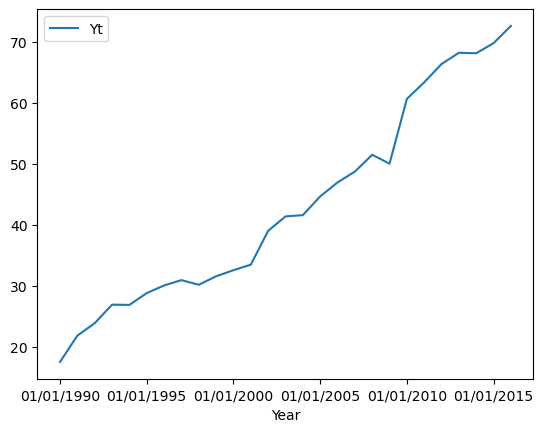

In [10]:
df.plot()

In [11]:
adfuller(train_df)

(-0.7827808449820531,
 0.8241278126711136,
 8,
 11,
 {'1%': -4.223238279489106,
  '5%': -3.189368925619835,
  '10%': -2.729839421487603},
 41.98035120729813)

In [12]:
model = Holt(train_df).fit(optimized=True)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,20
Model:,Holt,SSE,50.303
Optimized:,True,AIC,26.447
Trend:,Additive,BIC,30.430
Seasonal:,None,AICC,32.908
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,18:48:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8899450,alpha,True
smoothing_trend,0.000000,beta,True


default initialization method="heuristic", alternative is "estimated"

In [13]:
model = Holt(train_df, damped_trend=True).fit(optimized=True)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,20
Model:,Holt,SSE,52.531
Optimized:,True,AIC,29.313
Trend:,Additive,BIC,34.292
Seasonal:,None,AICC,38.647
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,18:48:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6712489,alpha,True
smoothing_trend,0.6712489,beta,True


In [14]:
model = Holt(train_df, exponential=True).fit(optimized=True)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,20
Model:,Holt,SSE,60.315
Optimized:,True,AIC,30.077
Trend:,Multiplicative,BIC,34.060
Seasonal:,None,AICC,36.538
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,18:48:10
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9670452,alpha,True
smoothing_trend,5.6192e-12,beta,True


In [15]:
model = Holt(train_df, exponential=True,initialization_method="heuristic").fit(optimized=True)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,20
Model:,Holt,SSE,60.315
Optimized:,True,AIC,30.077
Trend:,Multiplicative,BIC,34.060
Seasonal:,None,AICC,36.538
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,18:48:10
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9669758,alpha,True
smoothing_trend,0.000000,beta,True


In [16]:
model = Holt(train_df, damped_trend=False,exponential=False,initialization_method="estimated").fit(optimized=True)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,20
Model:,Holt,SSE,50.303
Optimized:,True,AIC,26.447
Trend:,Additive,BIC,30.430
Seasonal:,None,AICC,32.908
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,18:48:10
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8899828,alpha,True
smoothing_trend,0.000000,beta,True


In [17]:
model = Holt(train_df).fit(optimized=True)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,20
Model:,Holt,SSE,50.303
Optimized:,True,AIC,26.447
Trend:,Additive,BIC,30.430
Seasonal:,None,AICC,32.908
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,18:48:10
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8899450,alpha,True
smoothing_trend,0.000000,beta,True


In [18]:
fitted_values=model.fittedvalues
fitted_values_df=pd.DataFrame(fitted_values)
fitted_values_df
fitted_values_df.rename(columns = {0:'Fitted_Values'}, inplace = True)
fitted_values_df=fitted_values_df.reset_index(drop=True)

In [19]:
forecast_validation = model.forecast(7)
forecast_validation_df=pd.DataFrame(forecast_validation)
forecast_validation_df
forecast_validation_df.rename(columns = {0:'Forecast'}, inplace = True)
forecast_validation_df=forecast_validation_df.reset_index(drop=True)

In [20]:
fitted_forecast_df=pd.concat([fitted_values_df,forecast_validation_df])

In [21]:
fitted_forecast_df=fitted_forecast_df.reset_index(drop=True)
df_graph=df.reset_index(drop=True)

In [22]:
final_df=pd.concat([fitted_forecast_df,df_graph],axis=1)


In [23]:
date_range = pd.date_range(start='1990-01-01', periods=27,freq='MS')
date_range_df=pd.DataFrame(date_range)
date_range_df.rename(columns = {0:'Date'}, inplace = True)



<AxesSubplot:xlabel='Date'>

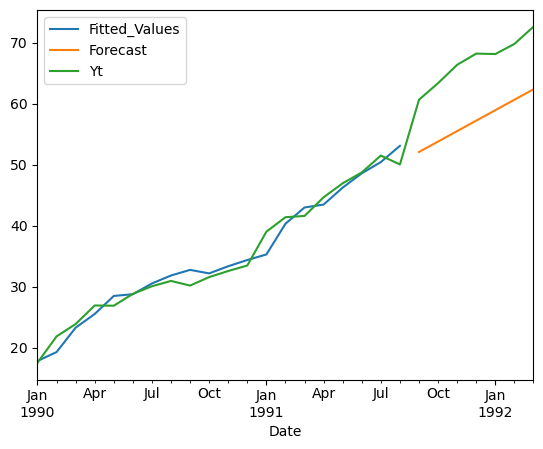

In [24]:
final=pd.concat([final_df,date_range_df],axis=1)
final
final=final.set_index("Date")
final.plot()

In [25]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
MAPE(final_df["Yt"],final_df["Forecast"])

14.630816395781329

In [26]:
mp=model.params
mp

{'smoothing_level': 0.8899449657943412,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 16.12945564334529,
 'initial_trend': 1.7118301906041242,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [27]:
mp=model.params
smoothing_level = list(mp.values())[0]
smoothing_trend=list(mp.values())[1]

In [28]:
final_model = Holt(df).fit(smoothing_trend=smoothing_trend,smoothing_level=smoothing_level)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [29]:
forecast_future = final_model.forecast(7)

In [30]:
df_graph=df.reset_index(drop=True)

In [31]:
final=pd.concat([df_graph,forecast_future])

In [32]:
final.rename(columns = {0:'Forecast'}, inplace = True)

In [33]:
final=final.reset_index(drop=True)

In [34]:
date_range = pd.date_range(start='1990-01-01', periods=34,freq='MS')
date_range_df=pd.DataFrame(date_range)
date_range_df.rename(columns = {0:'Date'}, inplace = True)

<AxesSubplot:xlabel='Date'>

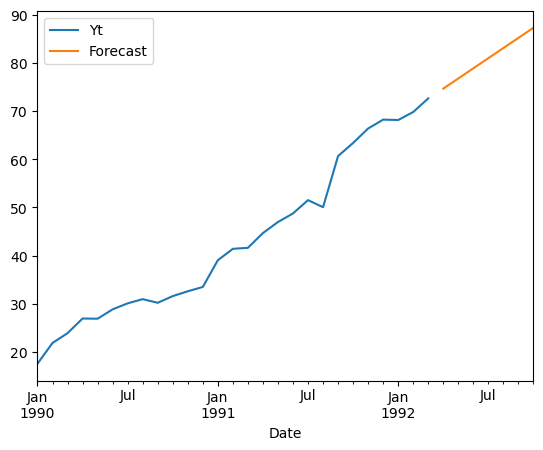

In [35]:
final=pd.concat([final,date_range_df],axis=1)
final
final=final.set_index("Date")
final.plot()